In [ ]:
!pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622363 sha256=1c92348b633c1e15d0688a1fd2fa6d8df663746bb868d041df15a8413f3f22f6
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import spacy
import nltk
import re
import seaborn as sns
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from textblob import TextBlob
from tabulate import tabulate
from autocorrect import Speller
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag, ne_chunk
from collections import Counter
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
annomi = pd.read_csv("/content/AnnoMI-full.csv")

In [ ]:
annomi.head(5)

mi_quality  transcript_id                               video_title  \
0       high              0  NEW VIDEO: Brief intervention: "Barbara"   
1       high              0  NEW VIDEO: Brief intervention: "Barbara"   
2       high              0  NEW VIDEO: Brief intervention: "Barbara"   
3       high              0  NEW VIDEO: Brief intervention: "Barbara"   
4       high              0  NEW VIDEO: Brief intervention: "Barbara"   

                                     video_url                         topic  \
0  https://www.youtube.com/watch?v=PaSKcfTmFEk  reducing alcohol consumption   
1  https://www.youtube.com/watch?v=PaSKcfTmFEk  reducing alcohol consumption   
2  https://www.youtube.com/watch?v=PaSKcfTmFEk  reducing alcohol consumption   
3  https://www.youtube.com/watch?v=PaSKcfTmFEk  reducing alcohol consumption   
4  https://www.youtube.com/watch?v=PaSKcfTmFEk  reducing alcohol consumption   

   utterance_id interlocutor timestamp  \
0             0    therapist  00:00:13   
1             1       client  00:00:24   
2             2    therapist  00:00:25   
3             3       client  00:00:34   
4             4    therapist  00:00:34   

                                      utterance_text  annotator_id  \
0  Thanks for filling it out. We give this form t...             3   
1                                              Sure.             3   
2  So, let's see. It looks that you put-- You dri...             3   
3                                            Mm-hmm.             3   
4  -and you usually have three to four drinks whe...             3   

  therapist_input_exists therapist_input_subtype reflection_exists  \
0                  False                     NaN             False   
1                    NaN                     NaN               NaN   
2                   True             information             False   
3                    NaN                     NaN               NaN   
4                   True             information             False   

  reflection_subtype question_exists question_subtype  \
0                NaN            True             open   
1                NaN             NaN              NaN   
2                NaN           False              NaN   
3                NaN             NaN              NaN   
4                NaN           False              NaN   

  main_therapist_behaviour client_talk_type  
0                 question              NaN  
1                      NaN          neutral  
2          therapist_input              NaN  
3                      NaN          neutral  
4          therapist_input              NaN

In [ ]:
# convert to  lower case
annomi_lower = annomi.copy()
annomi_lower[['utterance_text', 'video_title', 'topic']] = annomi_lower[['utterance_text', 'video_title', 'topic']].applymap(lambda x: x.lower())
annomi_lower.head(5)

mi_quality  transcript_id                               video_title  \
0       high              0  new video: brief intervention: "barbara"   
1       high              0  new video: brief intervention: "barbara"   
2       high              0  new video: brief intervention: "barbara"   
3       high              0  new video: brief intervention: "barbara"   
4       high              0  new video: brief intervention: "barbara"   

                                     video_url                         topic  \
0  https://www.youtube.com/watch?v=PaSKcfTmFEk  reducing alcohol consumption   
1  https://www.youtube.com/watch?v=PaSKcfTmFEk  reducing alcohol consumption   
2  https://www.youtube.com/watch?v=PaSKcfTmFEk  reducing alcohol consumption   
3  https://www.youtube.com/watch?v=PaSKcfTmFEk  reducing alcohol consumption   
4  https://www.youtube.com/watch?v=PaSKcfTmFEk  reducing alcohol consumption   

   utterance_id interlocutor timestamp  \
0             0    therapist  00:00:13   
1             1       client  00:00:24   
2             2    therapist  00:00:25   
3             3       client  00:00:34   
4             4    therapist  00:00:34   

                                      utterance_text  annotator_id  \
0  thanks for filling it out. we give this form t...             3   
1                                              sure.             3   
2  so, let's see. it looks that you put-- you dri...             3   
3                                            mm-hmm.             3   
4  -and you usually have three to four drinks whe...             3   

  therapist_input_exists therapist_input_subtype reflection_exists  \
0                  False                     NaN             False   
1                    NaN                     NaN               NaN   
2                   True             information             False   
3                    NaN                     NaN               NaN   
4                   True             information             False   

  reflection_subtype question_exists question_subtype  \
0                NaN            True             open   
1                NaN             NaN              NaN   
2                NaN           False              NaN   
3                NaN             NaN              NaN   
4                NaN           False              NaN   

  main_therapist_behaviour client_talk_type  
0                 question              NaN  
1                      NaN          neutral  
2          therapist_input              NaN  
3                      NaN          neutral  
4          therapist_input              NaN

In [ ]:
#removing special characters and stop words
stop_words = set(stopwords.words('english'))
#print(stop_words)
annomi_removal = annomi_lower.copy()
annomi_removal['utterance_text'] = annomi_removal['utterance_text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words and word.isalnum()))
annomi_removal.head(5)

mi_quality  transcript_id                               video_title  \
0       high              0  new video: brief intervention: "barbara"   
1       high              0  new video: brief intervention: "barbara"   
2       high              0  new video: brief intervention: "barbara"   
3       high              0  new video: brief intervention: "barbara"   
4       high              0  new video: brief intervention: "barbara"   

                                     video_url                         topic  \
0  https://www.youtube.com/watch?v=PaSKcfTmFEk  reducing alcohol consumption   
1  https://www.youtube.com/watch?v=PaSKcfTmFEk  reducing alcohol consumption   
2  https://www.youtube.com/watch?v=PaSKcfTmFEk  reducing alcohol consumption   
3  https://www.youtube.com/watch?v=PaSKcfTmFEk  reducing alcohol consumption   
4  https://www.youtube.com/watch?v=PaSKcfTmFEk  reducing alcohol consumption   

   utterance_id interlocutor timestamp  \
0             0    therapist  00:00:13   
1             1       client  00:00:24   
2             2    therapist  00:00:25   
3             3       client  00:00:34   
4             4    therapist  00:00:34   

                                      utterance_text  annotator_id  \
0  thanks filling give form everyone year regardl...             3   
1                                                                3   
2          looks drink alcohol least four times week             3   
3                                                                3   
4                          usually three four drinks             3   

  therapist_input_exists therapist_input_subtype reflection_exists  \
0                  False                     NaN             False   
1                    NaN                     NaN               NaN   
2                   True             information             False   
3                    NaN                     NaN               NaN   
4                   True             information             False   

  reflection_subtype question_exists question_subtype  \
0                NaN            True             open   
1                NaN             NaN              NaN   
2                NaN           False              NaN   
3                NaN             NaN              NaN   
4                NaN           False              NaN   

  main_therapist_behaviour client_talk_type  
0                 question              NaN  
1                      NaN          neutral  
2          therapist_input              NaN  
3                      NaN          neutral  
4          therapist_input              NaN

In [ ]:
#correct spelling mistakes
spell = Speller()
annomi_removal['utterance_text'] = annomi_removal['utterance_text'].apply(lambda x: ' '.join(spell(word) for word in x.split()))
annomi_removal.head(5)

mi_quality  transcript_id                               video_title  \
0       high              0  new video: brief intervention: "barbara"   
1       high              0  new video: brief intervention: "barbara"   
2       high              0  new video: brief intervention: "barbara"   
3       high              0  new video: brief intervention: "barbara"   
4       high              0  new video: brief intervention: "barbara"   

                                     video_url                         topic  \
0  https://www.youtube.com/watch?v=PaSKcfTmFEk  reducing alcohol consumption   
1  https://www.youtube.com/watch?v=PaSKcfTmFEk  reducing alcohol consumption   
2  https://www.youtube.com/watch?v=PaSKcfTmFEk  reducing alcohol consumption   
3  https://www.youtube.com/watch?v=PaSKcfTmFEk  reducing alcohol consumption   
4  https://www.youtube.com/watch?v=PaSKcfTmFEk  reducing alcohol consumption   

   utterance_id interlocutor timestamp  \
0             0    therapist  00:00:13   
1             1       client  00:00:24   
2             2    therapist  00:00:25   
3             3       client  00:00:34   
4             4    therapist  00:00:34   

                                      utterance_text  annotator_id  \
0  thanks filling give form everyone year regardl...             3   
1                                                                3   
2          looks drink alcohol least four times week             3   
3                                                                3   
4                          usually three four drinks             3   

  therapist_input_exists therapist_input_subtype reflection_exists  \
0                  False                     NaN             False   
1                    NaN                     NaN               NaN   
2                   True             information             False   
3                    NaN                     NaN               NaN   
4                   True             information             False   

  reflection_subtype question_exists question_subtype  \
0                NaN            True             open   
1                NaN             NaN              NaN   
2                NaN           False              NaN   
3                NaN             NaN              NaN   
4                NaN           False              NaN   

  main_therapist_behaviour client_talk_type  
0                 question              NaN  
1                      NaN          neutral  
2          therapist_input              NaN  
3                      NaN          neutral  
4          therapist_input              NaN

In [ ]:
#synonym replacement
annomi_synonym = annomi_removal.copy()

# function to get synonyms for a word
def get_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return set(synonyms)

# function to replace words in text with synonyms
def replace_with_synonyms(text):
    words = text.split()
    new_words = []
    for word in words:
        synonyms = get_synonyms(word)
        if synonyms:
            new_word = synonyms.pop()
        else:
            new_word = word
        new_words.append(new_word)
    return ' '.join(new_words)

# apply function to 'text' column
annomi_synonym['utterance_text_synonym'] = annomi_synonym['utterance_text'].apply(replace_with_synonyms)
annomi_synonym.head(5)

mi_quality  transcript_id                               video_title  \
0       high              0  new video: brief intervention: "barbara"   
1       high              0  new video: brief intervention: "barbara"   
2       high              0  new video: brief intervention: "barbara"   
3       high              0  new video: brief intervention: "barbara"   
4       high              0  new video: brief intervention: "barbara"   

                                     video_url                         topic  \
0  https://www.youtube.com/watch?v=PaSKcfTmFEk  reducing alcohol consumption   
1  https://www.youtube.com/watch?v=PaSKcfTmFEk  reducing alcohol consumption   
2  https://www.youtube.com/watch?v=PaSKcfTmFEk  reducing alcohol consumption   
3  https://www.youtube.com/watch?v=PaSKcfTmFEk  reducing alcohol consumption   
4  https://www.youtube.com/watch?v=PaSKcfTmFEk  reducing alcohol consumption   

   utterance_id interlocutor timestamp  \
0             0    therapist  00:00:13   
1             1       client  00:00:24   
2             2    therapist  00:00:25   
3             3       client  00:00:34   
4             4    therapist  00:00:34   

                                      utterance_text  annotator_id  \
0  thanks filling give form everyone year regardl...             3   
1                                                                3   
2          looks drink alcohol least four times week             3   
3                                                                3   
4                          usually three four drinks             3   

  therapist_input_exists therapist_input_subtype reflection_exists  \
0                  False                     NaN             False   
1                    NaN                     NaN               NaN   
2                   True             information             False   
3                    NaN                     NaN               NaN   
4                   True             information             False   

  reflection_subtype question_exists question_subtype  \
0                NaN            True             open   
1                NaN             NaN              NaN   
2                NaN           False              NaN   
3                NaN             NaN              NaN   
4                NaN           False              NaN   

  main_therapist_behaviour client_talk_type  \
0                 question              NaN   
1                      NaN          neutral   
2          therapist_input              NaN   
3                      NaN          neutral   
4          therapist_input              NaN   

                              utterance_text_synonym  
0  thanks fulfil grant build everyone yr regardle...  
1                                                     
2  search drink alcoholic_beverage least quatern ...  
3                                                     
4                       commonly leash quatern drink

In [ ]:
#tokenization
annomi_tokenization = annomi_synonym.copy()
annomi_tokenization['utterance_text_tokenized'] = annomi_tokenization['utterance_text'].apply(lambda x: word_tokenize(x))
annomi_tokenization.tail(3)
#annomi_tokenization.info()

mi_quality  transcript_id                          video_title  \
13548        low            131  stop smoking - initial consultation   
13549        low            131  stop smoking - initial consultation   
13550        low            131  stop smoking - initial consultation   

                                         video_url              topic  \
13548  https://www.youtube.com/watch?v=pL3zIl2hS-o  smoking cessation   
13549  https://www.youtube.com/watch?v=pL3zIl2hS-o  smoking cessation   
13550  https://www.youtube.com/watch?v=pL3zIl2hS-o  smoking cessation   

       utterance_id interlocutor timestamp   utterance_text  annotator_id  \
13548            88    therapist  00:06:21  would like come             9   
13549            89       client  00:06:24       nice phone             9   
13550            90    therapist  00:06:25            happy             9   

      therapist_input_exists therapist_input_subtype reflection_exists  \
13548                   True             negotiation             False   
13549                    NaN                     NaN               NaN   
13550                   True             negotiation             False   

      reflection_subtype question_exists question_subtype  \
13548                NaN            True             open   
13549                NaN             NaN              NaN   
13550                NaN           False              NaN   

      main_therapist_behaviour client_talk_type utterance_text_synonym  \
13548                 question              NaN      would wish derive   
13549                      NaN          neutral       decent telephone   
13550          therapist_input              NaN                   glad   

      utterance_text_tokenized  
13548      [would, like, come]  
13549            [nice, phone]  
13550                  [happy]

In [ ]:
# perform NER
nlp = spacy.load('en_core_web_sm')
nlp.max_length = 17000000
#import IPython
#IPython.core.display._iopub_data_rate_limit = 3000000
annomi_ner = pd.DataFrame(annomi_tokenization['utterance_text_tokenized'])
doc = nlp(annomi_ner.to_string())
entity, label = [], []
for ent in doc.ents:
  entity.append(ent.text), label.append(ent.label_)
annomi_nerlist = pd.DataFrame({'Entities':entity,'Labels':label})

In [ ]:
annomi_nerlist
#annomi_filter = annomi_nerlist[annomi_nerlist['Labels'] == 'DATE']
#annomi_filter

Entities    Labels
0                                                      1  CARDINAL
1      2                                             ...  CARDINAL
2                                                   four  CARDINAL
3                                                      3  CARDINAL
4                                                      4  CARDINAL
...                                                  ...       ...
14462                                              13546      DATE
14463                                              13547      DATE
14464                                              13548      DATE
14465                                              13549      DATE
14466                                              13550      DATE

[14467 rows x 2 columns]

In [ ]:
# Part-of-speech (POS) tagging identification
annomi_tokenization['pos_tags'] = annomi_tokenization['utterance_text_tokenized'].apply(lambda x: nltk.pos_tag(x))
annomi_tokenization.tail(3)

mi_quality  transcript_id                          video_title  \
13548        low            131  stop smoking - initial consultation   
13549        low            131  stop smoking - initial consultation   
13550        low            131  stop smoking - initial consultation   

                                         video_url              topic  \
13548  https://www.youtube.com/watch?v=pL3zIl2hS-o  smoking cessation   
13549  https://www.youtube.com/watch?v=pL3zIl2hS-o  smoking cessation   
13550  https://www.youtube.com/watch?v=pL3zIl2hS-o  smoking cessation   

       utterance_id interlocutor timestamp   utterance_text  annotator_id  \
13548            88    therapist  00:06:21  would like come             9   
13549            89       client  00:06:24       nice phone             9   
13550            90    therapist  00:06:25            happy             9   

       ... therapist_input_subtype reflection_exists reflection_subtype  \
13548  ...             negotiation             False                NaN   
13549  ...                     NaN               NaN                NaN   
13550  ...             negotiation             False                NaN   

      question_exists question_subtype main_therapist_behaviour  \
13548            True             open                 question   
13549             NaN              NaN                      NaN   
13550           False              NaN          therapist_input   

      client_talk_type utterance_text_synonym utterance_text_tokenized  \
13548              NaN      would wish derive      [would, like, come]   
13549          neutral       decent telephone            [nice, phone]   
13550              NaN                   glad                  [happy]   

                                    pos_tags  
13548  [(would, MD), (like, VB), (come, VB)]  
13549              [(nice, JJ), (phone, NN)]  
13550                          [(happy, JJ)]  

[3 rows x 21 columns]

In [ ]:
#lemmatization
lematizer = WordNetLemmatizer()
annomi_lematizer = annomi_tokenization.copy()
annomi_lematizer['utterance_text_lematized'] = annomi_lematizer['utterance_text_tokenized'].apply(lambda x: ' '.join(lematizer.lemmatize(word) for word in x))
annomi_lematizer.tail(5)

mi_quality  transcript_id                          video_title  \
13546        low            131  stop smoking - initial consultation   
13547        low            131  stop smoking - initial consultation   
13548        low            131  stop smoking - initial consultation   
13549        low            131  stop smoking - initial consultation   
13550        low            131  stop smoking - initial consultation   

                                         video_url              topic  \
13546  https://www.youtube.com/watch?v=pL3zIl2hS-o  smoking cessation   
13547  https://www.youtube.com/watch?v=pL3zIl2hS-o  smoking cessation   
13548  https://www.youtube.com/watch?v=pL3zIl2hS-o  smoking cessation   
13549  https://www.youtube.com/watch?v=pL3zIl2hS-o  smoking cessation   
13550  https://www.youtube.com/watch?v=pL3zIl2hS-o  smoking cessation   

       utterance_id interlocutor timestamp                 utterance_text  \
13546            86    therapist  00:06:17  okay would like come back see   
13547            87       client  00:06:20                                  
13548            88    therapist  00:06:21                would like come   
13549            89       client  00:06:24                     nice phone   
13550            90    therapist  00:06:25                          happy   

       annotator_id  ... reflection_exists reflection_subtype question_exists  \
13546             9  ...             False                NaN            True   
13547             9  ...               NaN                NaN             NaN   
13548             9  ...             False                NaN            True   
13549             9  ...               NaN                NaN             NaN   
13550             9  ...             False                NaN           False   

      question_subtype main_therapist_behaviour client_talk_type  \
13546           closed                 question              NaN   
13547              NaN                      NaN          neutral   
13548             open                 question              NaN   
13549              NaN                      NaN          neutral   
13550              NaN          therapist_input              NaN   

                  utterance_text_synonym  \
13546  fine would wish derive rear catch   
13547                                      
13548                  would wish derive   
13549                   decent telephone   
13550                               glad   

                   utterance_text_tokenized  \
13546  [okay, would, like, come, back, see]   
13547                                    []   
13548                   [would, like, come]   
13549                         [nice, phone]   
13550                               [happy]   

                                                pos_tags  \
13546  [(okay, RB), (would, MD), (like, VB), (come, V...   
13547                                                 []   
13548              [(would, MD), (like, VB), (come, VB)]   
13549                          [(nice, JJ), (phone, NN)]   
13550                                      [(happy, JJ)]   

            utterance_text_lematized  
13546  okay would like come back see  
13547                                 
13548                would like come  
13549                     nice phone  
13550                          happy  

[5 rows x 22 columns]

In [ ]:
#Feature extraction (example using TF-IDF)
annomi_tfidf = annomi_lematizer['utterance_text_lematized']

tfidf = TfidfVectorizer()
tfidf.fit(annomi_tfidf)

feature_names = tfidf.get_feature_names_out()
annomi_matrix = tfidf.transform(annomi_tfidf)
#annomi_feature_extraction_data = pd.DataFrame(annomi_feature_extraction_matrix.toarray(), columns=tfidf.get_feature_names())

# print the feature names and their corresponding tf-idf scores
for col in annomi_matrix.nonzero()[1]:
    print(feature_names[col], ":", annomi_matrix[0, col])

Streaming output truncated to the last 5000 lines.
maybe : 0.0
made : 0.0
law : 0.0
decide : 0.0
would : 0.0
started : 0.0
science : 0.0
maybe : 0.0
math : 0.0
looking : 0.0
definitely : 0.0
career : 0.0
working : 0.0
stuff : 0.0
sound : 0.0
shop : 0.0
said : 0.0
really : 0.0
like : 0.0
hard : 0.0
hang : 0.0
good : 0.0
going : 0.0
goal : 0.0
go : 0.0
drink : 0.0
also : 0.0
two : 0.0
party : 0.0
one : 0.0
maybe : 0.0
drink : 0.0
think : 0.0
often : 0.0
twice : 0.0
month : 0.0
maybe : 0.0
like : 0.0
twice : 0.0
month : 0.0
like : 0.0
time : 0.0
maybe : 0.0
like : 0.0
20 : 0.0
lot : 0.0
kind : 0.0
drinking : 0.0
actually : 0.0
say : 0.0
guess : 0.0
think : 0.0
ever : 0.0
two : 0.0
something : 0.0
party : 0.0
lot : 0.0
look : 0.2005454099059158
like : 0.0
getting : 0.0
friend : 0.0
even : 0.0
drunk : 0.0
drink : 0.0
bug : 0.0
appeal : 0.0
actually : 0.0
drunk : 0.0
maybe : 0.0
like : 0.0
two : 0.0
ever : 0.0
drink : 0.0
stuff : 0.0
know : 0.0
bad : 0.0
year : 0.23283158546942093
thing : 0.

In [ ]:
data = ["CEO of Apple is Tim Cook and Tim Cook was the successor of Apple or Apple Apple"]
tfidf = TfidfVectorizer()
tfidf.fit(data)

# extract the feature names and their corresponding tf-idf scores
feature_names = tfidf.get_feature_names_out()
data_matrix = tfidf.transform(data)

# print the feature names and their corresponding tf-idf scores
for col in data_matrix.nonzero()[1]:
    print(feature_names[col], ":", data_matrix[0, col])

was : 0.1690308509457033
tim : 0.3380617018914066
the : 0.1690308509457033
successor : 0.1690308509457033
or : 0.1690308509457033
of : 0.3380617018914066
is : 0.1690308509457033
cook : 0.3380617018914066
ceo : 0.1690308509457033
apple : 0.6761234037828132
and : 0.1690308509457033


In [ ]:
# check for missing values but don't remove as these are justified NAN values
annomi_lematizer.isna().sum()/annomi_lematizer.shape[0]*100
#annomi_stemmer.shape

mi_quality                   0.000000
transcript_id                0.000000
video_title                  0.000000
video_url                    0.000000
topic                        0.000000
utterance_id                 0.000000
interlocutor                 0.000000
timestamp                    0.000000
utterance_text               0.000000
annotator_id                 0.000000
therapist_input_exists      49.627334
therapist_input_subtype     91.026493
reflection_exists           49.627334
reflection_subtype          85.085972
question_exists             49.627334
question_subtype            82.931149
main_therapist_behaviour    49.627334
client_talk_type            50.372666
utterance_text_synonym       0.000000
utterance_text_tokenized     0.000000
pos_tags                     0.000000
utterance_text_lematized     0.000000
dtype: float64

In [ ]:
#check for unique values
for col in ['annotator_id', 'mi_quality','interlocutor','client_talk_type','question_subtype','therapist_input_exists','therapist_input_subtype','reflection_exists','reflection_subtype','question_exists','main_therapist_behaviour']:
  print(col,annomi_lematizer[col].unique())

annotator_id [3 4 6 9 1 7 0 2 5 8]
mi_quality ['high' 'low']
interlocutor ['therapist' 'client']
client_talk_type [nan 'neutral' 'change' 'sustain']
question_subtype ['open' nan 'closed']
therapist_input_exists [False nan True]
therapist_input_subtype [nan 'information' 'negotiation' 'options' 'advice']
reflection_exists [False nan True]
reflection_subtype [nan 'simple' 'complex']
question_exists [True nan False]
main_therapist_behaviour ['question' nan 'therapist_input' 'reflection' 'other']


<Axes: xlabel='main_therapist_behaviour', ylabel='count'>

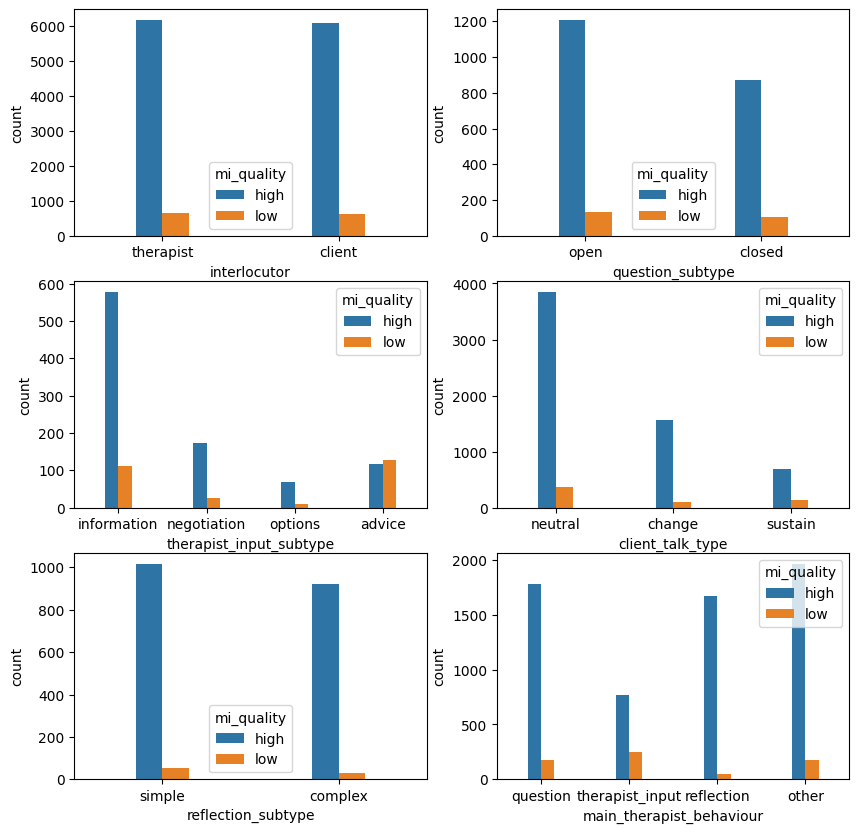

In [ ]:
# EDA to check quality
#(annomi_stemmer.groupby(by='mi_quality').size()/annomi_stemmer.shape[0]*100).plot.pie(autopct='%1.1f%%')
#annomi_stemmer.groupby(by='interlocutor').size()
fig, ax = plt.subplots(3,2, figsize=(10, 10))
sns.countplot(x='interlocutor', hue='mi_quality', data=annomi_lematizer, saturation=0.8, width=0.3, ax=ax[0,0])
sns.countplot(x='question_subtype',hue='mi_quality',data=annomi_lematizer, saturation=0.8, width=0.3, ax=ax[0,1])
sns.countplot(x='therapist_input_subtype',hue='mi_quality',data=annomi_lematizer, saturation=0.8, width=0.3, ax=ax[1,0])
sns.countplot(x='client_talk_type',hue='mi_quality',data=annomi_lematizer, saturation=0.8, width=0.3, ax=ax[1,1])
sns.countplot(x='reflection_subtype',hue='mi_quality',data=annomi_lematizer, saturation=0.8, width=0.3, ax=ax[2,0])
sns.countplot(x='main_therapist_behaviour',hue='mi_quality',data=annomi_lematizer, saturation=0.8, width=0.3, ax=ax[2,1])
#annomi_lematizer.info()

topic
anxiety management                                                                     0.582983
asthma management                                                                      3.180577
avoiding doi                                                                           2.907534
being assertive with flatmate about moving out                                         0.457531
better oral health                                                                     0.715814
birth control                                                                          0.265663
changing approach to disease                                                           2.324552
charging battery                                                                       0.214006
completion of community service                                                        0.339458
compliance with rules                                                                  1.077411
diabetes management               

<Axes: xlabel='count', ylabel='topic'>

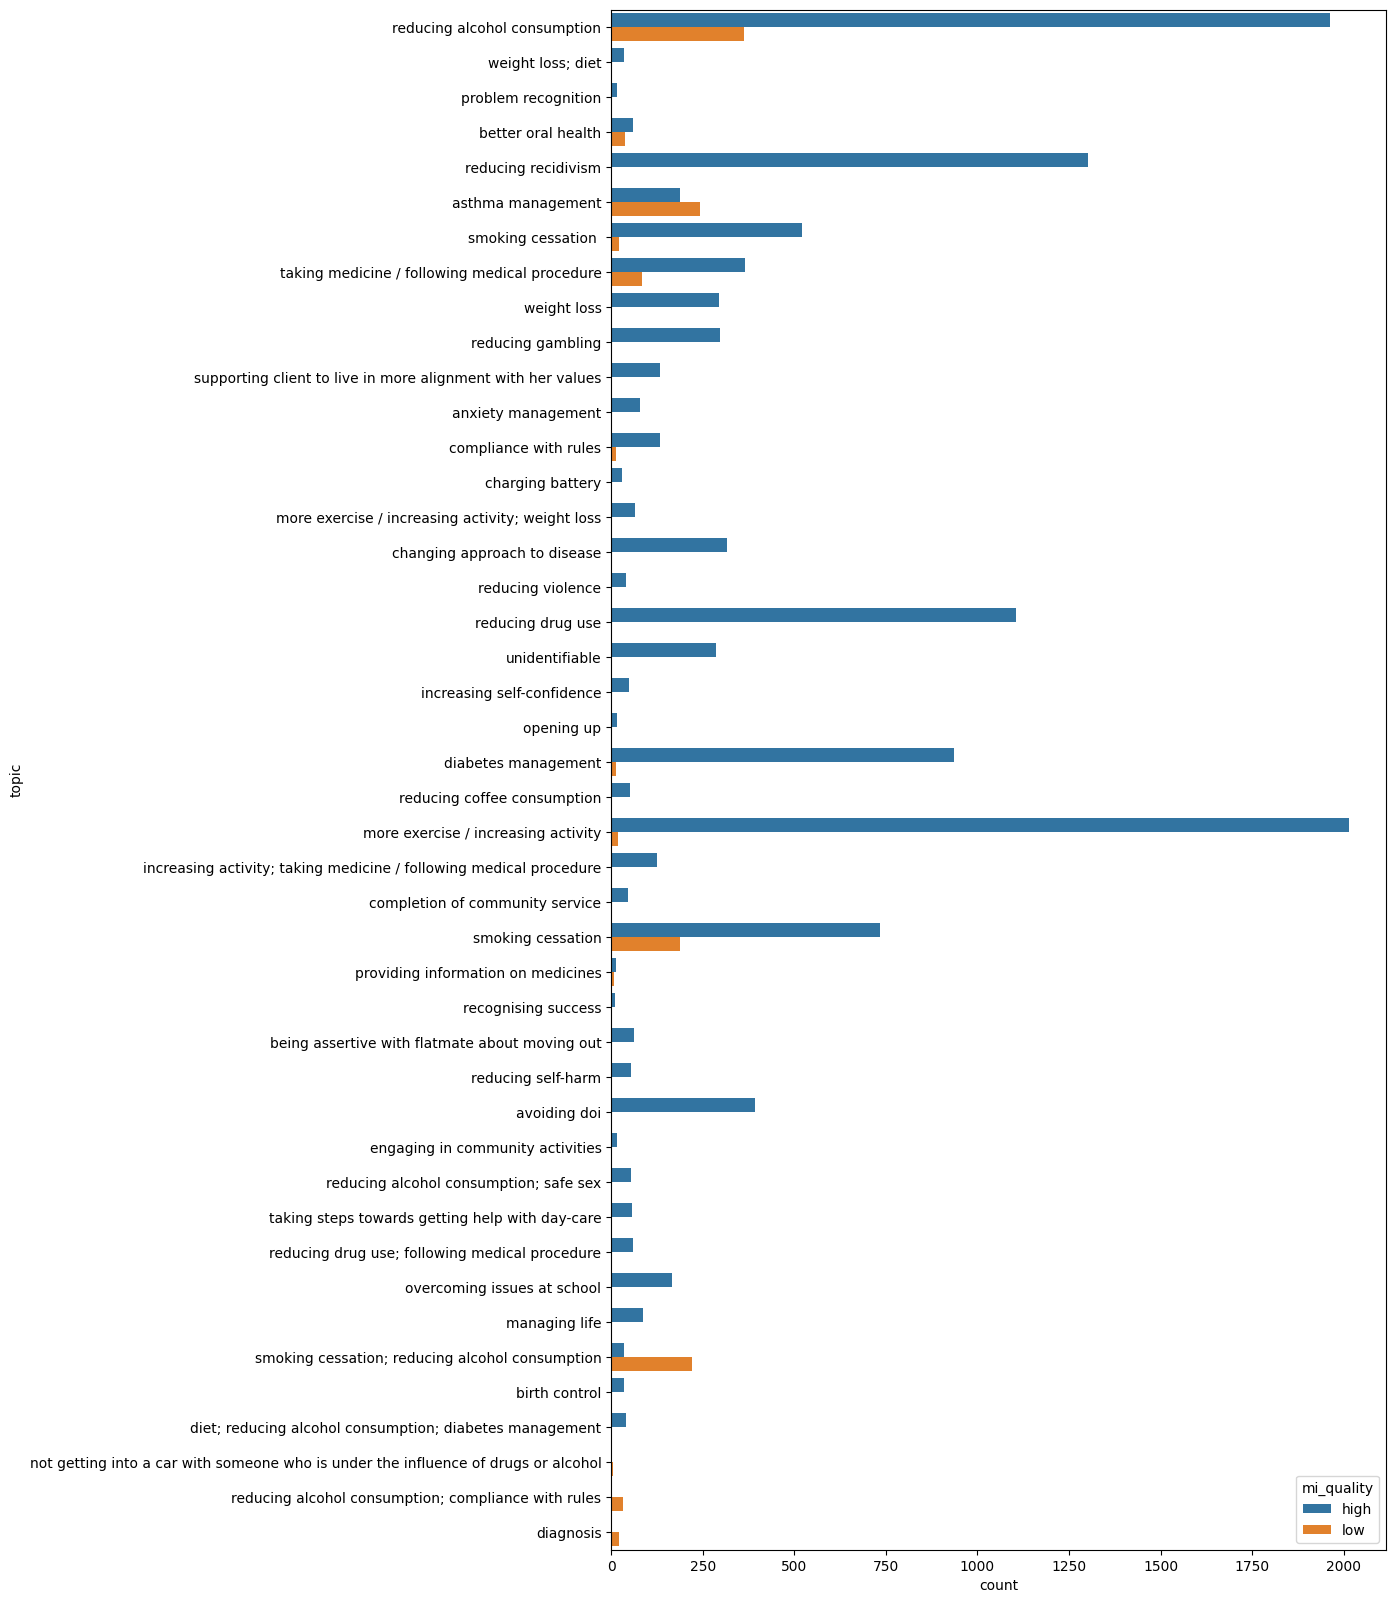

In [ ]:
# quality topic wise
print(annomi_lematizer.groupby(by='topic').size()/annomi_lematizer.shape[0]*100)
plt.figure(figsize=(10,20))
sns.countplot(y='topic', hue='mi_quality', data=annomi_lematizer)

utterance_id
annotator_id              
0                 8.316729
1                 9.342484
2                 7.541879
3                10.471552
4                13.261014
5                 9.859051
6                10.515829
7                10.877426
8                11.032396
9                 8.781640

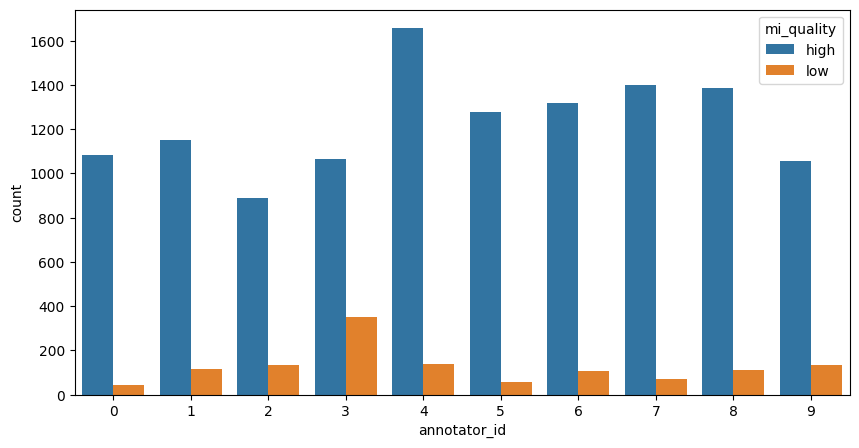

In [ ]:
#workload on annotator id
plt.figure(figsize=(10,5))
#sns.countplot(x='annotator_id', hue='m_quality', data=annomi_stemmer)
sns.countplot(x='annotator_id', hue='mi_quality', data = annomi_lematizer)
annomi_lematizer.groupby('annotator_id').agg({'utterance_id':'count'})/annomi_lematizer.shape[0]*100

In [ ]:
#annomi_text = pd.DataFrame(annomi_stemmer, columns=['utterance_text'])
annomi_sentiment = annomi_lematizer[['utterance_text_lematized']]

def get_sentiment(text):
  blob = TextBlob(text)
  sentiment = blob.sentiment.polarity
  return sentiment

annomi_lematizer['sentiment'] = annomi_lematizer['utterance_text_lematized'].apply(get_sentiment)
annomi_lematizer.tail(5)

mi_quality  transcript_id                          video_title  \
13546        low            131  stop smoking - initial consultation   
13547        low            131  stop smoking - initial consultation   
13548        low            131  stop smoking - initial consultation   
13549        low            131  stop smoking - initial consultation   
13550        low            131  stop smoking - initial consultation   

                                         video_url              topic  \
13546  https://www.youtube.com/watch?v=pL3zIl2hS-o  smoking cessation   
13547  https://www.youtube.com/watch?v=pL3zIl2hS-o  smoking cessation   
13548  https://www.youtube.com/watch?v=pL3zIl2hS-o  smoking cessation   
13549  https://www.youtube.com/watch?v=pL3zIl2hS-o  smoking cessation   
13550  https://www.youtube.com/watch?v=pL3zIl2hS-o  smoking cessation   

       utterance_id interlocutor timestamp                 utterance_text  \
13546            86    therapist  00:06:17  okay would like come back see   
13547            87       client  00:06:20                                  
13548            88    therapist  00:06:21                would like come   
13549            89       client  00:06:24                     nice phone   
13550            90    therapist  00:06:25                          happy   

       annotator_id  ... reflection_subtype question_exists question_subtype  \
13546             9  ...                NaN            True           closed   
13547             9  ...                NaN             NaN              NaN   
13548             9  ...                NaN            True             open   
13549             9  ...                NaN             NaN              NaN   
13550             9  ...                NaN           False              NaN   

      main_therapist_behaviour client_talk_type  \
13546                 question              NaN   
13547                      NaN          neutral   
13548                 question              NaN   
13549                      NaN          neutral   
13550          therapist_input              NaN   

                  utterance_text_synonym  \
13546  fine would wish derive rear catch   
13547                                      
13548                  would wish derive   
13549                   decent telephone   
13550                               glad   

                   utterance_text_tokenized  \
13546  [okay, would, like, come, back, see]   
13547                                    []   
13548                   [would, like, come]   
13549                         [nice, phone]   
13550                               [happy]   

                                                pos_tags  \
13546  [(okay, RB), (would, MD), (like, VB), (come, V...   
13547                                                 []   
13548              [(would, MD), (like, VB), (come, VB)]   
13549                          [(nice, JJ), (phone, NN)]   
13550                                      [(happy, JJ)]   

            utterance_text_lematized sentiment  
13546  okay would like come back see      0.25  
13547                                     0.00  
13548                would like come      0.00  
13549                     nice phone      0.60  
13550                          happy      0.80  

[5 rows x 23 columns]

In [ ]:
annomi_lematizer['sentiment'].value_counts().sort_index()

-1.000000     2
-0.800000     3
-0.800000     4
-0.750000     1
-0.714286     5
             ..
 0.766667     1
 0.800000     1
 0.800000    76
 0.850000    13
 1.000000    15
Name: sentiment, Length: 750, dtype: int64

In [ ]:
annomi_tokenization.shape

(13551, 21)

In [ ]:
# covert to tuples
tuples = annomi_lematizer.itertuples(index=False)
for row in tuples:
  print(row)

Pandas(mi_quality='high', transcript_id=0, video_title='new video: brief intervention: "barbara"', video_url='https://www.youtube.com/watch?v=PaSKcfTmFEk', topic='reducing alcohol consumption', utterance_id=0, interlocutor='therapist', timestamp='00:00:13', utterance_text='thanks filling give form everyone year regardless come helps us provide better okay take look put', annotator_id=3, therapist_input_exists=False, therapist_input_subtype=nan, reflection_exists=False, reflection_subtype=nan, question_exists=True, question_subtype='open', main_therapist_behaviour='question', client_talk_type=nan, utterance_text_synonym='thanks fulfil grant build everyone yr regardless derive assistant u provide secure fine look_at search order', utterance_text_tokenized=['thanks', 'filling', 'give', 'form', 'everyone', 'year', 'regardless', 'come', 'helps', 'us', 'provide', 'better', 'okay', 'take', 'look', 'put'], pos_tags=[('thanks', 'NNS'), ('filling', 'VBG'), ('give', 'JJ'), ('form', 'NN'), ('every

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Pandas(mi_quality='high', transcript_id=129, video_title='doctor uses motivational interviewing to discuss contraception', video_url='https://www.youtube.com/watch?v=fX2Frhh-dvk', topic='birth control', utterance_id=15, interlocutor='therapist', timestamp='00:01:15', utterance_text='would open kind exploring idea birth control family', annotator_id=7, therapist_input_exists=False, therapist_input_subtype=nan, reflection_exists=False, reflection_subtype=nan, question_exists=True, question_subtype='closed', main_therapist_behaviour='question', client_talk_type=nan, utterance_text_synonym='would out-of-doors variety search musical_theme birthing keep_in_line sept', utterance_text_tokenized=['would', 'open', 'kind', 'exploring', 'idea', 'birth', 'control', 'family'], pos_tags=[('would', 'MD'), ('open', 'VB'), ('kind', 'NN'), ('exploring', 'VBG'), ('idea', 'NN'), ('birth', 'NN'), ('control', 'NN'), ('family', 'NN')], utterance_text_lematized='would open kind exploring idea birth control fam